# Explore a NuGrid star model in iPython notebook

## How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code
* in this notebook you use the [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

## Initialize session

In [28]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Trajectory 12M, Z=0.006, MS


In [29]:
s=ms.star_log(mass=12,Z=0.006)

nugrid_path = /data/nugrid_apod2/
closest set is set1.3a (Z = 0.006)
closest mass is 12.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


<IPython.core.display.Javascript object>


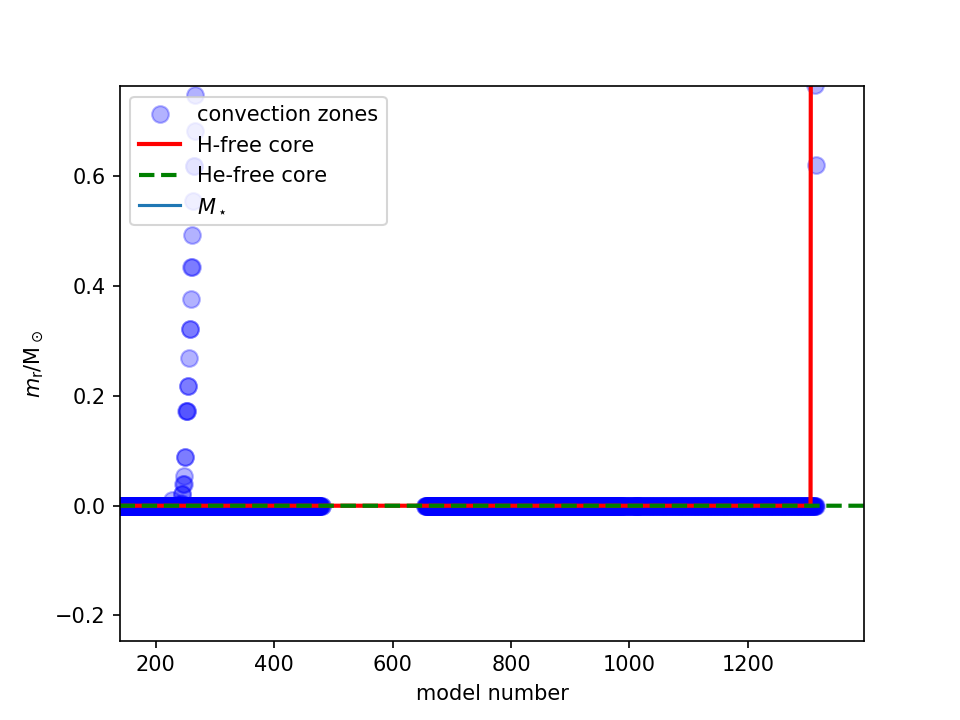

In [30]:
ifig=111;close(ifig);figure(ifig)
s.kippenhahn(111,'model')

What's happening at the centre of the star? ...

<IPython.core.display.Javascript object>


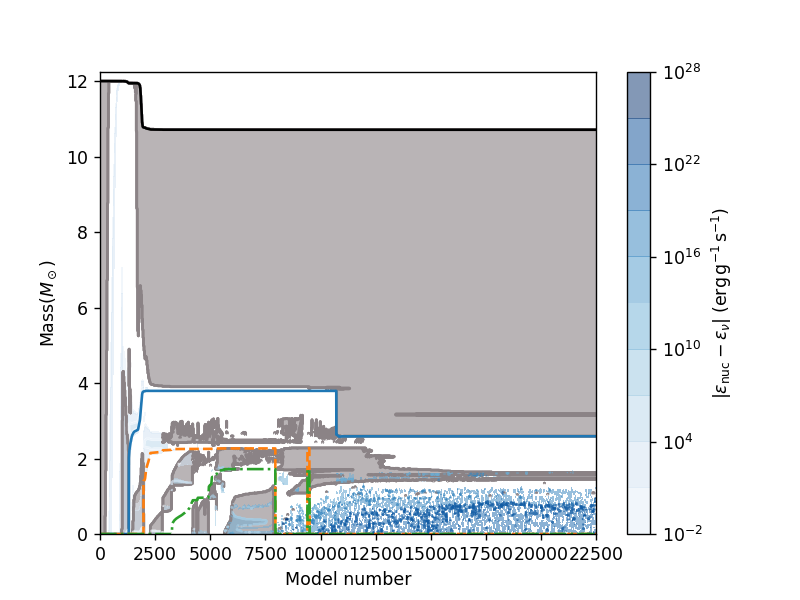

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [4]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 2 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [5]:
%ls /data/nugrid_apod2/data/set1ext/set1.1/

ppd_exp/  ppd_exp_yemcut/  ppd_wind/  see_exp/  see_exp_yemcut/  see_wind/


In [10]:
mp.se?

In [31]:
pt=mp.se(mass=12,Z=0.006)

nugrid_path = /data/nugrid_apod2/
closest set is set1.3a (Z = 0.006)
closest mass is 12.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


## Two ways of writing the trajectory

### nugridse method "trajectory" 
This method writes a trajectory at constant mass. The docstring says it interpolates to the given mass coordinate. The output format does not have any headers and creates a blank file, which is not good.

In [20]:
m_coor = 0.15
model_start = 235
r,rho,temperature, time = pt.trajectory(model_start, 1306, 10, m_coor, age_in_sec=True, online=False)

 reading ['age']...98%98%..98%

### ascii_table method 
The  `ascii_table.writeTraj` method of the `ascii_table` module of NuGridPy is meant to produce a standard trajectory format with header. 

**Task A1:** Use `ascii_table.writeTraj` in `nugridse.trajectory` for writing the actual trajectory.

**Task A2:** Make sure that `ascii_table.writeTraj` trajectory is a valid nsource option in `ppn`.


In [24]:
from nugridpy import ascii_table as at

In [26]:
at.writeTraj(filename='trajectory.input', data=[time,temperature,rho], ageunit=1, tunit=1, rhounit=0, idNum=0)

In [27]:
%less trajectory.input

## Extract initial abundance at beginning of trajectory
This method produces an initial abundance file in some odd format, it does have a header, however, we have maybe other formats for this, such as the `iniab.dat` format?

In [21]:
pt.abund_at_masscoordinate(model_start,m_coor,online=False)

 reading ['rho']...100%iso_massf
 reading ['iso_massf']...100%

**Task B1:** Review the output format of `nugridse.abund_at_masscoordinate` method. Is there a better format for initial abundances already supported in `ppn`?

**Task B2:** Make sure that whatever the adopted output of `nugridse.abund_at_masscoordinate` is, it can be read correctly by `ppn`.

## Extract Set1 trajectories

With this capability in hand we can extract trajectories from all environments to be found in Set1Ext. 

Trajectory name   | comment       | lead
------------------|---------------|-----
MS burn low-mass  | M=2, Z=0.01   |
MS burn massives  | M=25, Z=0.01  | Falk
PDCZ              | ....          | Adria
CC explosion      | ....          | Syndey?

**Task C1:** add to this table
**Task C2:** extract a trajectory, setup a ppn RUN